In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 10 13:17:46 2022

@author: BetzLab-Admin
"""

import sys
sys.path.append('../../lib')
from tqdm import tqdm
from scipy.signal import fftconvolve
import numpy as np
import os
import matplotlib.pyplot as plt
from fast_detection_methods import trajectory_gauss, trajectory_mean, trajectory_corr
from movie_processing import movie_to_array, clean_problem_pixels
from Powerspectra import powerspectrum, fit_power_spectrum, plot_power_spectra, fast_analytical_noisy_powerspectrum
#from pipython.datarectools import getservotime
import cv2
import Powerspectra
from Powerspectra import bin_data
#core.set_exposure(0.5)##sets the cameras exposure time for snapshots to half a milisecond

In [2]:
from SpectralMechanicsAnalysis import Data, mean_back_realxation, mean_back_relaxation_multiple_trajectories, mean_back_relaxation_multiple_trajectories_with_timestamps, mean_back_relaxation_multiple_trajectories_with_timestamps

In [3]:
def select_file(khz_value, files):
    for file in files:
        if f"{khz_value}_khz" in file:
            return file
    return None

In [4]:
data_path = r'\\134.76.13.158\betzlab\Julian\Hydrogel\measurement_2'

file_list =[ file for file in  os.listdir(data_path) if file.endswith('.avi')]
print(file_list)

['10_khz_Export_20231006_112401.avi', '1_khz_Export_20231006_104624.avi', '25_khz_Export_20231006_140921.avi', '50_khz_Export_20231006_121201.avi', '5_khz_Export_20231006_105529.avi']


In [4]:
f_list = [1,5,10,25]
fk_list = []
ps_list = []
x_trajectory_list = []
y_trajectory_list = []
for f in f_list:
    f_data_path = os.path.join(data_path, f'{f}_khz')
    x_trajectory = np.load(os.path.join(f_data_path,r"corr\x_trajecories.npy"))
    y_trajectory = np.load(os.path.join(f_data_path,r"corr\y_trajecories.npy"))
    x_trajectory_list.append(x_trajectory)
    y_trajectory_list.append(y_trajectory)
    fk, ps = powerspectrum(x_trajectory, 1/f/1000)

    fk_list.append(fk)
    ps_list.append(ps)

In [46]:
f_list = [1,5,10,25]
fk_list = []
ps_list = []
for f in f_list:
    f_data_path = os.path.join(data_path, f'{f}_khz')
    x_trajectory = np.load(os.path.join(f_data_path,r"corr\x_trajecories.npy"))
    fk, ps = powerspectrum(x_trajectory, 1/f/1000)

    fk_list.append(fk)
    ps_list.append(ps)

    bin_centers, bin_edges, binnumber = bin_data(fk, ps)

In [47]:
fk_list

[array([1.32886834e-02, 2.65773667e-02, 3.98660501e-02, ...,
        4.99973423e+02, 4.99986711e+02, 5.00000000e+02]),
 array([5.00000e-02, 1.00000e-01, 1.50000e-01, ..., 2.49990e+03,
        2.49995e+03, 2.50000e+03]),
 array([1.0000e-01, 2.0000e-01, 3.0000e-01, ..., 4.9998e+03, 4.9999e+03,
        5.0000e+03]),
 array([2.500000e-01, 5.000000e-01, 7.500000e-01, ..., 1.249950e+04,
        1.249975e+04, 1.250000e+04])]

In [57]:
results_list = []
for fk, ps in zip(fk_list, ps_list):
    results = fit_power_spectrum(fk, ps,num_bins = 10, fix_f_c= True, log_space=False)
    results_list.append(results)

In [58]:
results_list

[{'dt': {'value': 0.0009999999999999998},
  'Kbt_over_gamma': {'value': 0.07020746826195055,
   'uncertainty': 0.0017601369334216193},
  'f_c': {'value': 0, 'uncertainty': 0},
  'noise_param': {'value': 0.03642092247872207,
   'uncertainty': 0.00011207511952613977}},
 {'dt': {'value': 0.0002},
  'Kbt_over_gamma': {'value': 0.04407766381032722,
   'uncertainty': 0.001656008268467567},
  'f_c': {'value': 0, 'uncertainty': 0},
  'noise_param': {'value': 0.03307240390235128,
   'uncertainty': 7.990056679191404e-05}},
 {'dt': {'value': 0.0001},
  'Kbt_over_gamma': {'value': 0.10722541976499297,
   'uncertainty': 0.0038105675343319623},
  'f_c': {'value': 0, 'uncertainty': 0},
  'noise_param': {'value': 0.023298383682782798,
   'uncertainty': 5.976623045067363e-05}},
 {'dt': {'value': 4e-05},
  'Kbt_over_gamma': {'value': 0.22177844378543726,
   'uncertainty': 0.008311453885073415},
  'f_c': {'value': 0, 'uncertainty': 0},
  'noise_param': {'value': 0.03308783924611678,
   'uncertainty': 7.9

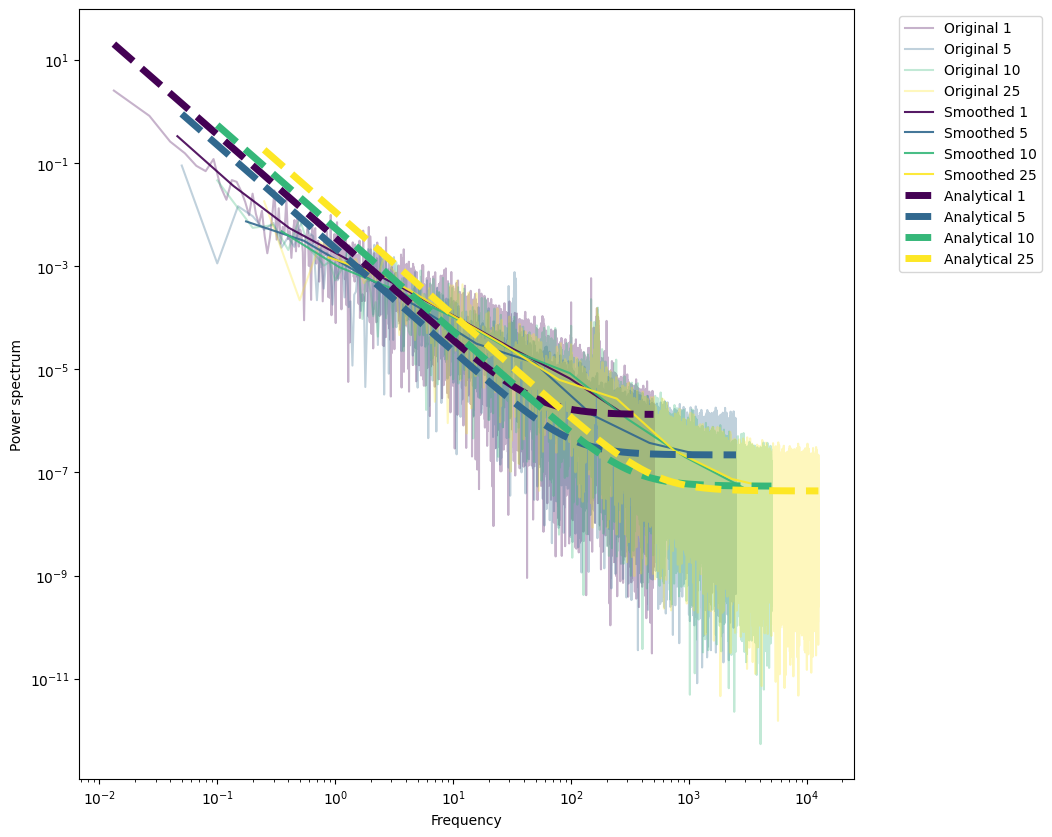

In [59]:
Powerspectra.plot_power_spectra(fk_list, ps_list, results_list, f_list, num_bins = 10)
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 


In [37]:
#print the noise level and frequencies

for results, freq in zip(results_list, f_list):
    print(f"frequency: {freq} kHz")
    print(f"noise level: {results['noise_param']['value']} +- {results['noise_param']['uncertainty']}")


#for results in results_list:

#    print(f"noise level: {results['noise_param']['value']} +- {results['noise_param']['uncertainty']}")

frequency: 1 kHz
noise level: 0.0 +- inf
frequency: 5 kHz
noise level: -2.61495722935735e-10 +- inf
frequency: 10 kHz
noise level: -5.067112580477697e-10 +- inf
frequency: 25 kHz
noise level: -2.491270565784957e-10 +- inf


C:\Users\jschulz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jschulz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


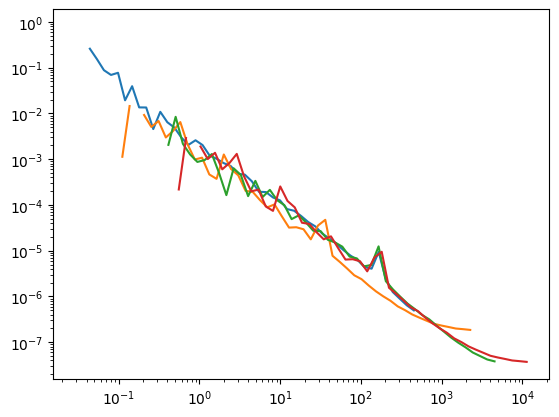

In [14]:



# Binning data logarithmically
num_bins = 50
for fk, ps in zip(fk_list, ps_list):
    bin_edges = np.logspace(np.log10(fk[1]), np.log10(fk[-1]), num_bins)
    bin_indices = np.digitize(fk, bin_edges)
    bin_ps = [np.mean(ps[bin_indices == i]) for i in range(1, len(bin_edges))]

    # For plotting purposes, we might want to use the geometric mean of the bin edges
    bin_centers = np.sqrt(bin_edges[:-1] * bin_edges[1:])
    plt.loglog(bin_centers, bin_ps)

plt.show()

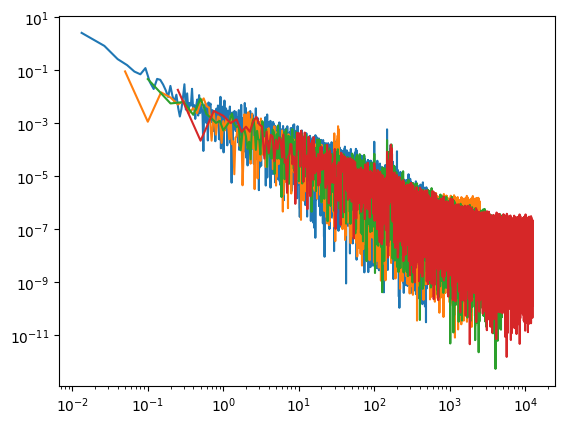

In [15]:
for fk, ps in zip(fk_list, ps_list):
    plt.loglog(fk, ps)
plt.show()